In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(rc={'figure.figsize':(10,6.180)})
sns.set_style("whitegrid")

%matplotlib inline

In [46]:
def my_reorder(a, first):
    # move first to the top. and keep the rest
    new_order = first.copy()
    for col in a:
        if col not in first:
            new_order.append(col)
    return new_order

def read_pdb(pre, name, run=30, rerun=2):
    all_data = []
    for i in range(run):
        for j in range(rerun):
            # pre = "/Users/weilu/Research/server/nov_2018/iterative_optimization_4/all_simulations/"
            location = pre + f"{name}/simulation/{i}/{j}/"
            try:
                wham = pd.read_csv(location+"wham.dat")
            except:
                print(f"PDB: {name}, Run: {i}, Rerun: {j} not exist")
                print(location+"wham.dat")
                continue
            wham.columns = wham.columns.str.strip()
            remove_columns = ['Tc', 'Energy']
            wham = wham.drop(remove_columns, axis=1)
            energy = pd.read_csv(location+"energy.dat")
            energy.columns = energy.columns.str.strip()
            remove_columns = ['Steps', 'Shake', 'Excluded', 'DSSP', 'Helix', 'AMH-Go', 'Vec_FM', 'Membrane', 'SSB']
            energy = energy.drop(remove_columns, axis=1)
            data = pd.concat([wham, energy], axis=1).assign(Repeat=i, Run=j)
            all_data.append(data)
    data = pd.concat(all_data).reset_index(drop=True)
    data = data.reindex(columns=my_reorder(data.columns, ["Steps", "Qw", "VTotal", "Run", "Repeat"]))
    print(name, len(data))
    return data

In [49]:
dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]

def get_complete_data(pre, folder_list, pdb_list, **kwargs):
    complete_all_data = []
    for folder in folder_list:
        # pre = "/Users/weilu/Research/server/april_2019/iterative_optimization_old_set/"
        pre_folder = f"{pre}{folder}/"
        all_data = []
        for p in pdb_list:
            name = p.lower()[:4]
            tmp = read_pdb(pre_folder, name, **kwargs)
            all_data.append(tmp.assign(Name=name))
        data = pd.concat(all_data)
        complete_all_data.append(data.assign(Folder=folder))
    data = pd.concat(complete_all_data)
    data = data.reindex(columns=my_reorder(data.columns, ["Name", "Folder"]))
    return data



In [62]:
pre = "/Users/weilu/Research/server/april_2019/iterative_optimization_combined_train_set/"
folder_list = ["iter2_normalized_noFrag"]
pdb_list = dataset["combined"]
data = get_complete_data(pre, folder_list, pdb_list, run=10, rerun=2)
subset_data = data.query("Steps % 80000 == 0")
today = datetime.datetime.today().strftime('%m-%d')
print(today)
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/energy_{today}.csv")
# a = pd.read_csv("/Users/weilu/Research/data/optimization/energy_03-31.csv", index_col=0)
# b = pd.read_csv("/Users/weilu/Research/data/optimization/energy_04-01.csv", index_col=0)
# data = pd.concat([a,b])
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/energy_{today}.csv")

1r69 20000
1utg 20000
3icb 20000
256b 20000
4cpv 20000
1ccr 20000
2mhr 20000
1mba 15000
2fha 14421
1fc2 40000
1enh 40000
2gb1 40000
2cro 40000
1ctf 40000
4icb 40000
04-01


In [72]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/energy_04-01.csv", index_col=0)

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [76]:
data.shape

(1228195, 17)

In [74]:
subset_data = data.query("Steps % 80000 == 0")

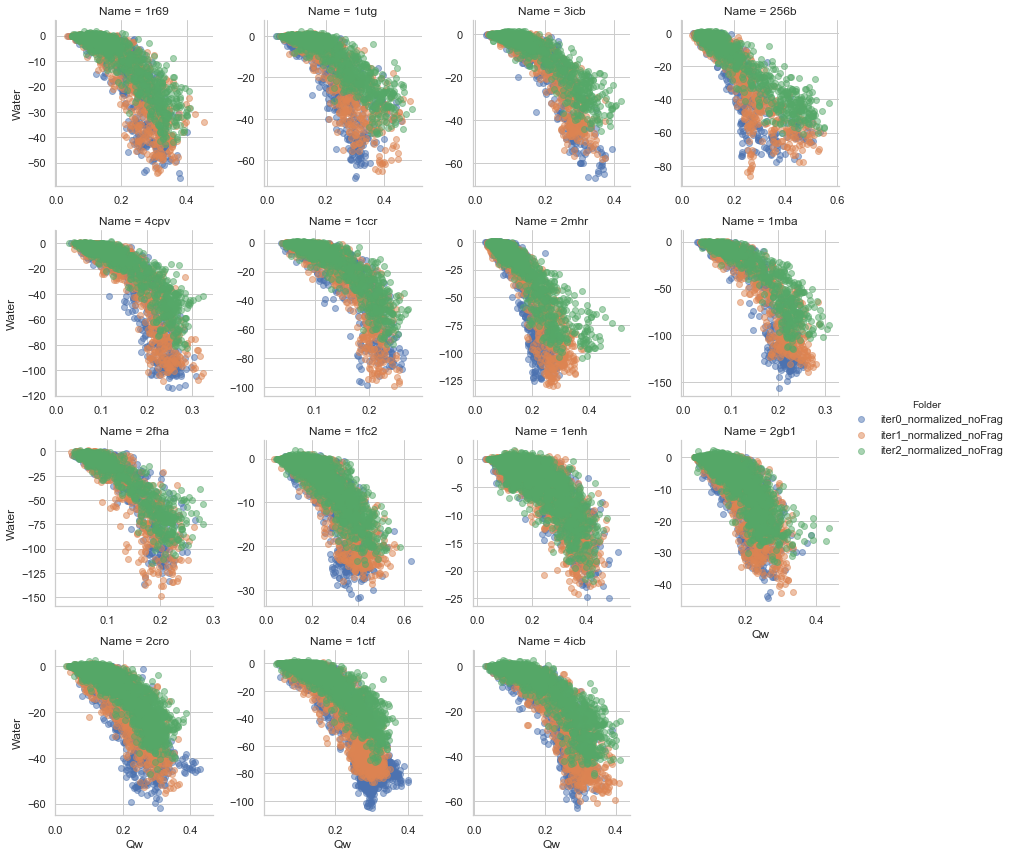

In [75]:
g = sns.FacetGrid(subset_data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", "Water", alpha=0.5).add_legend())

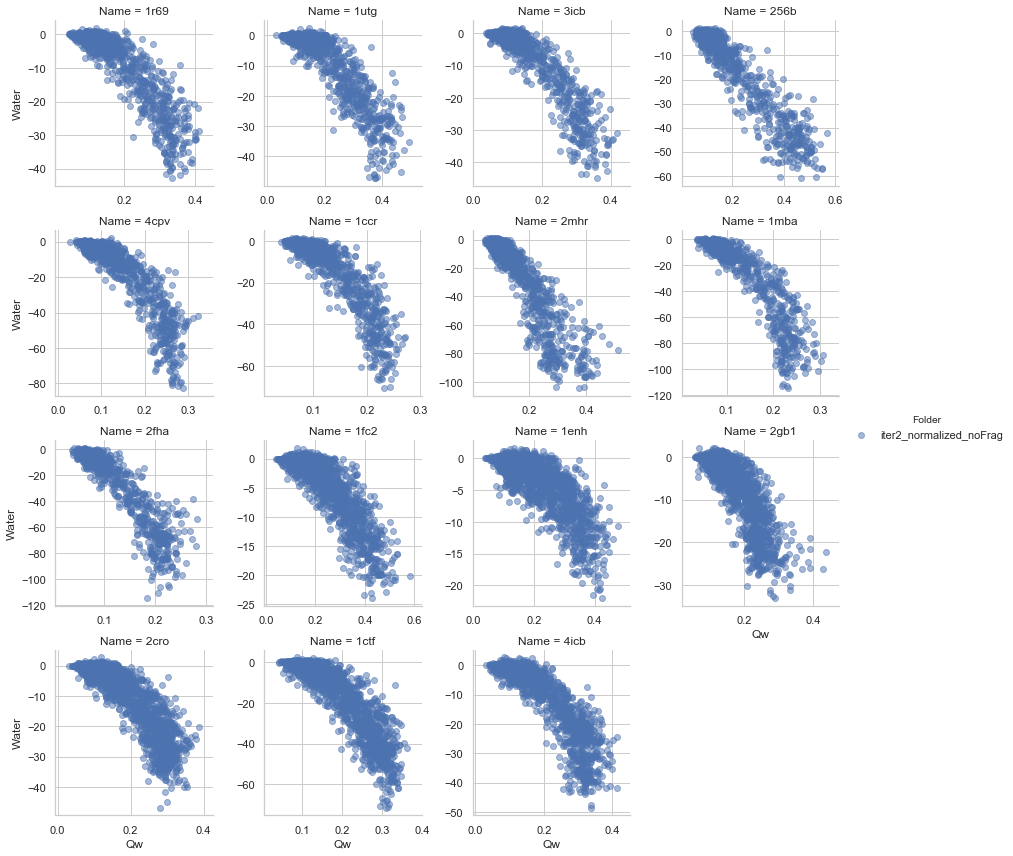

In [64]:
g = sns.FacetGrid(subset_data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", "Water", alpha=0.5).add_legend())

In [50]:
pre = "/Users/weilu/Research/server/april_2019/iterative_optimization_combined_train_set/"
folder_list = ["iter0_normalized_noFrag", "iter1_normalized_noFrag"]
pdb_list = dataset["combined"]
data = get_complete_data(pre, folder_list, pdb_list, run=10, rerun=2)
subset_data = data.query("Steps % 80000 == 0")
today = datetime.datetime.today().strftime('%m-%d')
print(today)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/energy_{today}.csv")

1r69 20000
1utg 20000
3icb 20000
256b 20000
4cpv 20000
1ccr 20000
2mhr 20000
1mba 15000
2fha 14738
1fc2 40000
1enh 40000
2gb1 40000
2cro 40000
1ctf 40000
4icb 40000
1r69 20000
1utg 20000
3icb 20000
256b 20000
4cpv 20000
1ccr 20000
2mhr 20000
1mba 15000
2fha 14036
1fc2 40000
1enh 40000
2gb1 40000
2cro 40000
1ctf 40000
4icb 40000


In [52]:
today = datetime.datetime.today().strftime('%m-%d')
print(today)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/energy_{today}.csv")

03-31


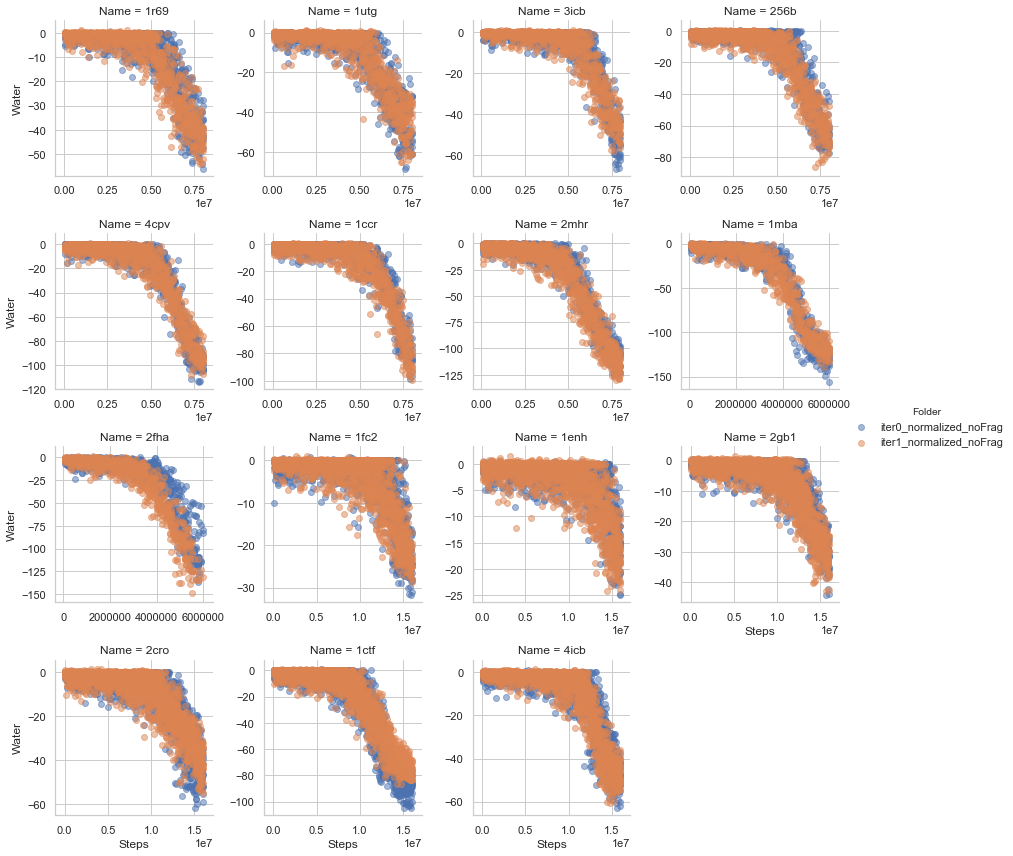

In [57]:
g = sns.FacetGrid(subset_data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Steps", "Water", alpha=0.5).add_legend())

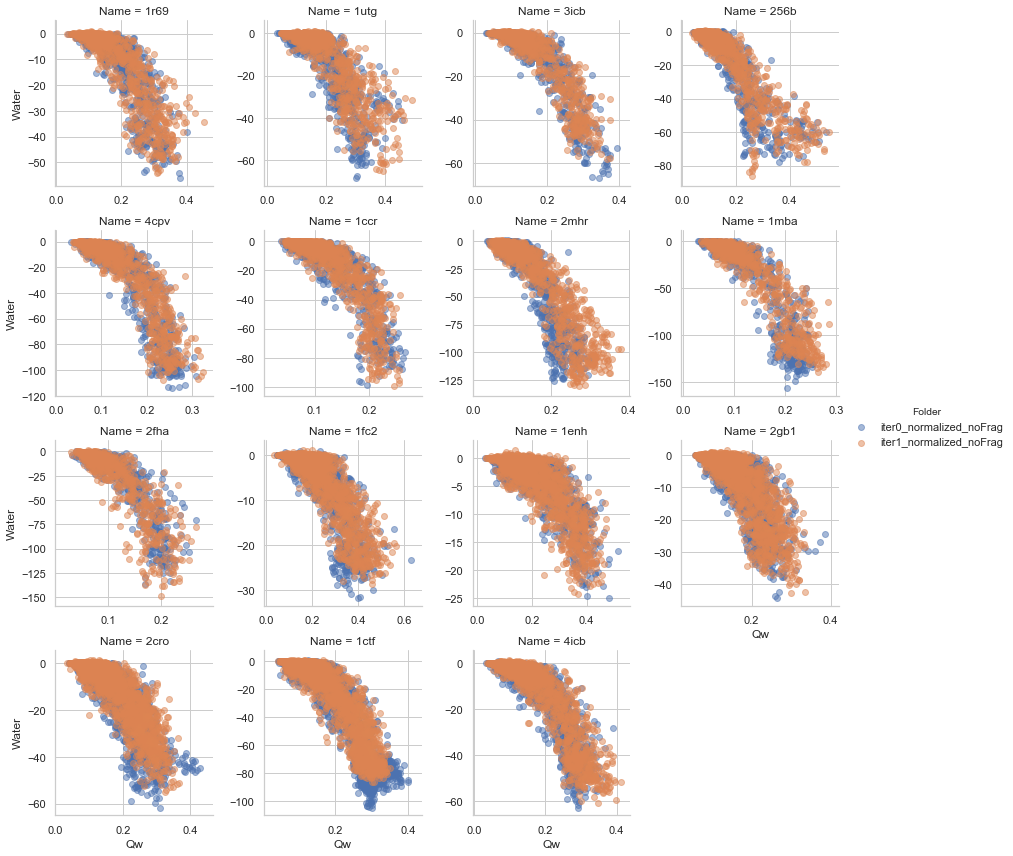

In [58]:
g = sns.FacetGrid(subset_data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", "Water", alpha=0.5).add_legend())

In [31]:
dataset = {"old":("1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "), 40),
            "new":("1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "), 80),
            "test":(["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"], 40)}
pdb_list, steps = dataset["old"]

complete_all_data = []
for folder in ["single", "noFrag"]:
    pre = f"/Users/weilu/Research/server/april_2019/iterative_optimization_old_set/{folder}/"
    all_data = []
    for p in pdb_list:
        name = p.lower()[:4]
        tmp = read_pdb(pre, name, run=30, rerun=1)
        all_data.append(tmp.assign(Name=name))
    data = pd.concat(all_data)
    complete_all_data.append(data.assign(Folder=folder))
data = pd.concat(complete_all_data)
data = data.reindex(columns=my_reorder(data.columns, ["Name", "Folder"]))
data_subset = data.query("Steps % 80000 == 0")

1r69 30000
1utg 30000
3icb 30000
256b 30000
4cpv 30000
1ccr 30000
2mhr 30000
1mba 23146
2fha 19885
1r69 30000
1utg 30000
3icb 30000
256b 30000
4cpv 30000
1ccr 30000
2mhr 30000
1mba 25680
2fha 22113


In [32]:
data.head()

,Name,Folder,Steps,Qw,VTotal,Run,Repeat,Rg,Chain,Chi,Rama,P_AP,Water,Burial,Frag_Mem,Ebond,Epair
0,1r69,single,4000,0.087288,-97.248076,0,0,30.620022,84.805297,28.447449,-76.387581,0,-1.560166,-51.343641,-81.209434,185.385749,4.497708
1,1r69,single,8000,0.179975,-183.634765,0,0,22.565086,111.754883,16.184323,-113.969007,0,-4.159232,-53.089330,-140.356402,177.924318,14.831873
2,1r69,single,12000,0.235191,-220.810608,0,0,16.929506,95.902273,21.480374,-113.593651,0,-7.269499,-53.867215,-163.462890,153.082652,8.920596
3,1r69,single,16000,0.377747,-255.999037,0,0,11.232515,95.598735,16.251947,-133.302030,0,-22.810907,-54.899661,-156.837122,178.698420,4.564993
4,1r69,single,20000,0.205453,-211.454610,0,0,18.008032,91.545729,19.502155,-116.180706,0,-10.169564,-52.802971,-143.349253,164.482353,10.297213


In [33]:
data_subset = data.query("Steps % 80000 == 0")

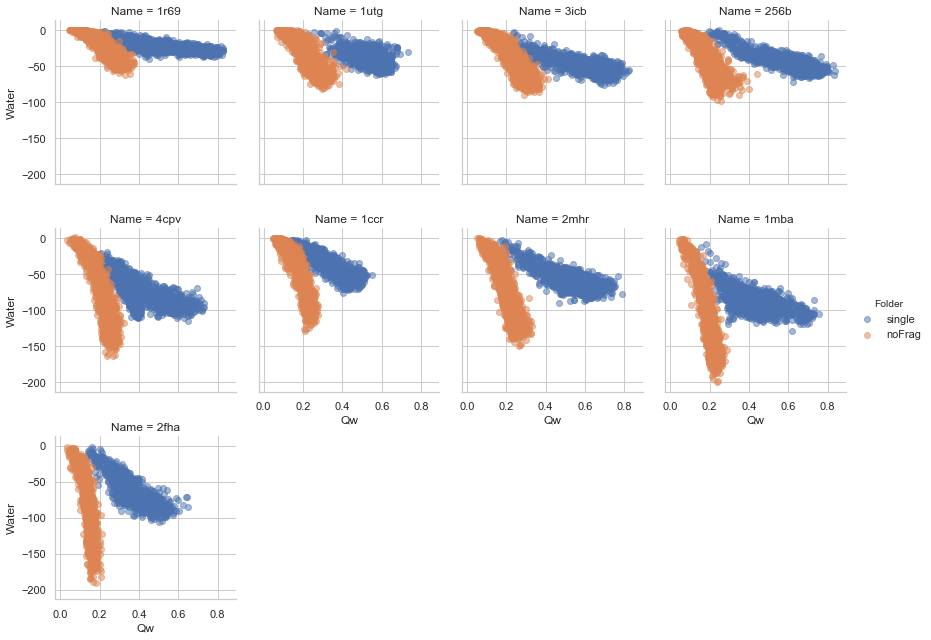

In [40]:
g = sns.FacetGrid(data_subset, col="Name",col_wrap=4,  hue="Folder")
g = (g.map(plt.scatter, "Qw", "Water", alpha=0.5).add_legend())

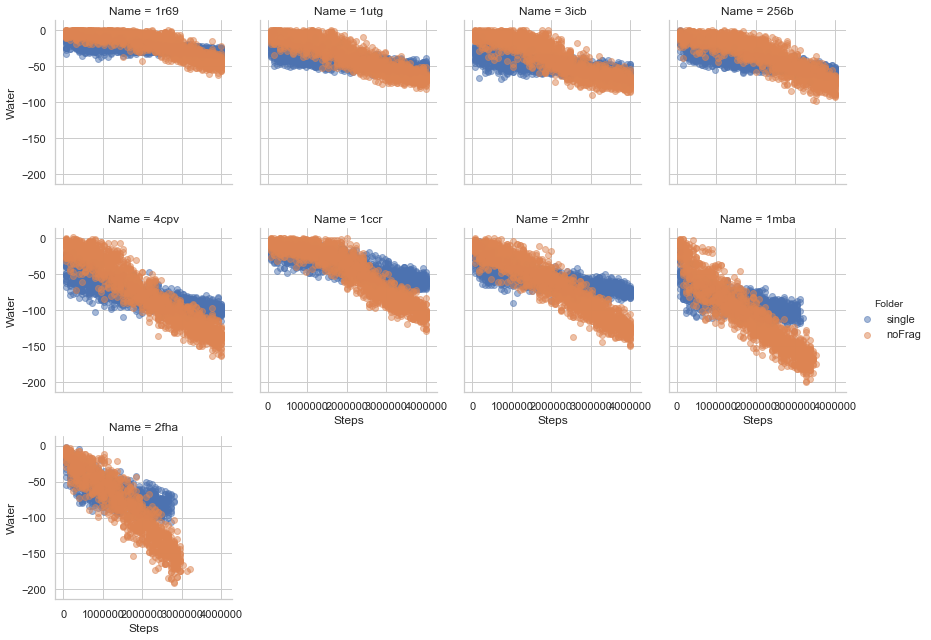

In [39]:
g = sns.FacetGrid(data_subset, col="Name",col_wrap=4,  hue="Folder")
g = (g.map(plt.scatter, "Steps", "Water", alpha=0.5).add_legend())

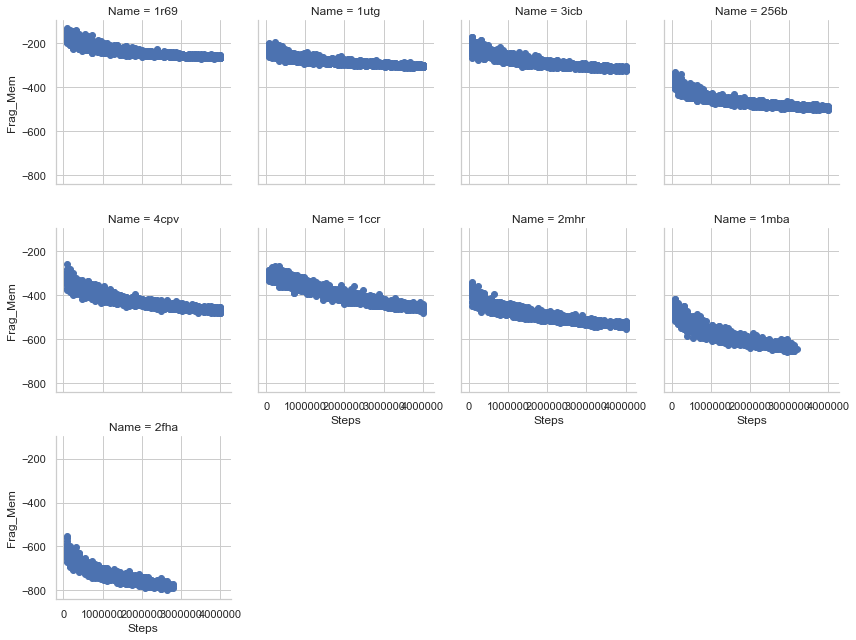

In [27]:
g = sns.FacetGrid(data_subset, col="Name",col_wrap=4)
g = g.map(plt.scatter, "Steps", "Frag_Mem")

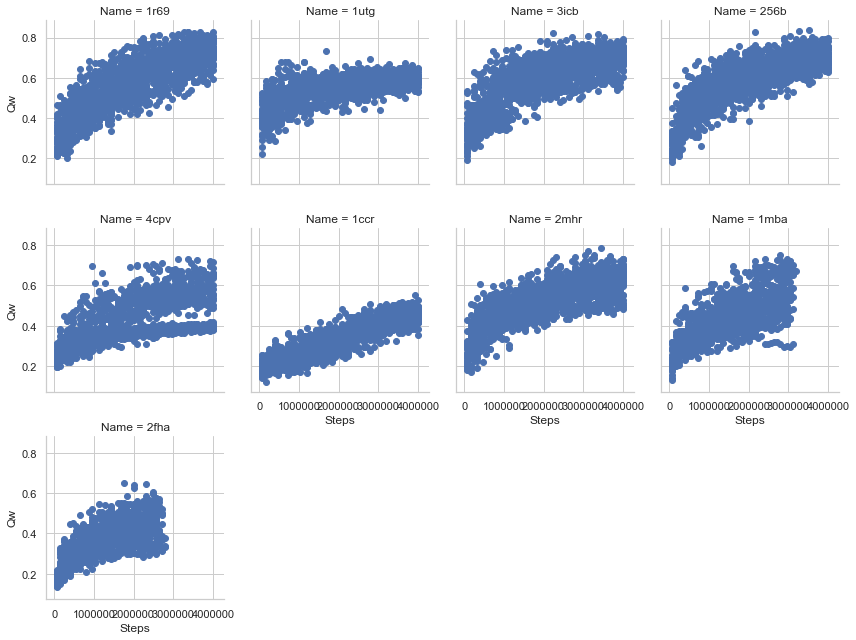

In [29]:
g = sns.FacetGrid(data_subset, col="Name",col_wrap=4)
g = g.map(plt.scatter, "Steps", "Qw")

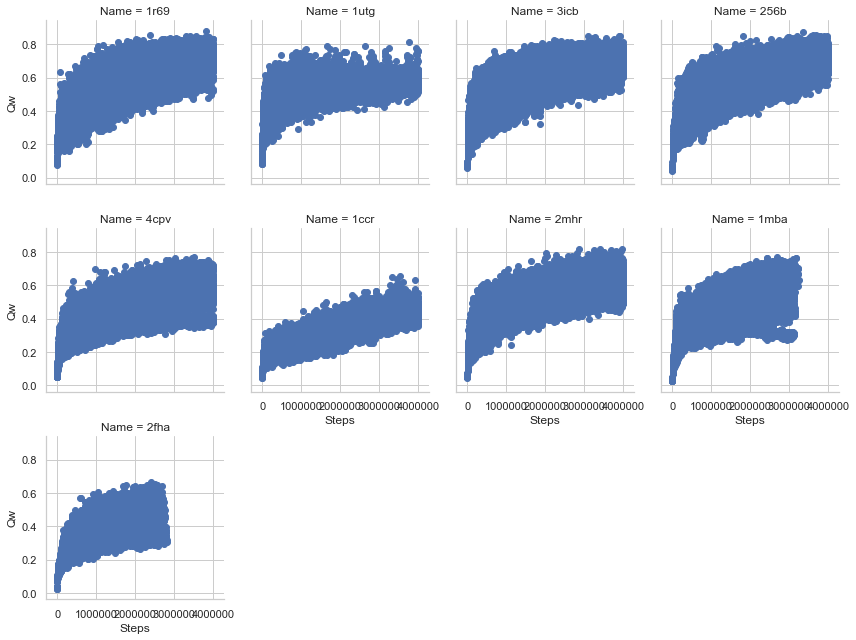

In [16]:
g = sns.FacetGrid(data, col="Name",col_wrap=4)
g = g.map(plt.scatter, "Steps", "Qw")